In [19]:
# This analysis was conceived and written by AI (ChatGPT)

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# Install spaCy if not already installed
!pip install -q spacy

# Download the English model
!python -m spacy download en_core_web_sm

import spacy
from collections import Counter

# Load English model
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 44.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [22]:
import pandas as pd
import os

def load_documents(doc_type):
    # Initialize articles array and Google Drive directory path
    articles = []
    directory = '/content/drive/MyDrive/WRIT20833_Final_Project/project_data/'

    all_files = os.listdir(directory)

    # Filter matching files
    doc_files = [f for f in all_files if f.lower().startswith(f'{doc_type}_doc_') and f.lower().endswith('.txt')]

    # Read each file and store info in a list of dictionaries
    for filename in sorted(doc_files):
        filepath = os.path.join(directory, filename)
        try:
            with open(filepath, 'r', encoding='utf-8') as f:
                text = f.read().strip()
                if text:
                    word_count = len(text.split())
                    articles.append(text)
                    print(f"  ✓ Loaded {filename}: {word_count} words")
        except Exception as e:
            print(f"  ✗ Error loading {filename}: {e}")

    print(f"\nSuccessfully loaded {len(articles)} {doc_type} documents.\n")
    return articles


In [23]:
soviet_documents = load_documents('soviet')
western_documents = load_documents('western')

  ✓ Loaded soviet_doc_1.txt: 6839 words
  ✓ Loaded soviet_doc_10.txt: 349 words
  ✓ Loaded soviet_doc_11.txt: 601 words
  ✓ Loaded soviet_doc_12.txt: 1095 words
  ✓ Loaded soviet_doc_13.txt: 1086 words
  ✓ Loaded soviet_doc_14.txt: 3481 words
  ✓ Loaded soviet_doc_15.txt: 455 words
  ✓ Loaded soviet_doc_16.txt: 1314 words
  ✓ Loaded soviet_doc_2.txt: 3053 words
  ✓ Loaded soviet_doc_3.txt: 93873 words
  ✓ Loaded soviet_doc_4.txt: 691 words
  ✓ Loaded soviet_doc_5.txt: 474 words
  ✓ Loaded soviet_doc_6.txt: 1035 words
  ✓ Loaded soviet_doc_7.txt: 179 words
  ✓ Loaded soviet_doc_8.txt: 179 words
  ✓ Loaded soviet_doc_9.txt: 1231 words

Successfully loaded 16 soviet documents.

  ✓ Loaded western_doc_1.txt: 51033 words
  ✓ Loaded western_doc_10.txt: 1104 words
  ✓ Loaded western_doc_11.txt: 270 words
  ✓ Loaded western_doc_12.txt: 2308 words
  ✓ Loaded western_doc_13.txt: 3588 words
  ✓ Loaded western_doc_14.txt: 320 words
  ✓ Loaded western_doc_15.txt: 493 words
  ✓ Loaded western_doc_2.

In [24]:
soviet_df = pd.read_csv('/content/drive/MyDrive/WRIT20833_Final_Project/processed_data/soviet_sentiment.csv')
western_df = pd.read_csv('/content/drive/MyDrive/WRIT20833_Final_Project/processed_data/western_sentiment.csv')

In [25]:
import re
from collections import Counter
import time

def extract_entities_safe(documents, entity_types=None, chunk_size=500, verbose=True):
    entities_per_doc = []
    overall_counter = Counter()

    for idx, text in enumerate(documents, start=1):
        if not isinstance(text, str):
            text = str(text)
        text = text.strip()
        text = re.sub(r'\S{100,}', ' ', text)  # remove extreme long sequences

        text_entities = []
        chunks = re.findall(r'.{1,%d}' % chunk_size, text)

        print(f"[{idx}/{len(documents)}] Processing {len(chunks)} chunks...")

        for chunk_idx, chunk in enumerate(chunks, start=1):
            try:
                if chunk_idx % 100 == 0:  # Progress every 100 chunks
                    print(f"  ... chunk {chunk_idx}/{len(chunks)}")

                doc = nlp(chunk)
                chunk_entities = [ent.text for ent in doc.ents if entity_types is None or ent.label_ in entity_types]
                text_entities.extend(chunk_entities)
            except Exception as e:
                print(f"⚠️ Skipping chunk {chunk_idx} in doc {idx}: {e}")

        entities_per_doc.append(text_entities)
        overall_counter.update(text_entities)

        if verbose:
            print(f"[{idx}/{len(documents)}] ✓ Extracted {len(text_entities)} entities\n")

    print(f"\n✅ Entity extraction complete for {len(documents)} documents.\n")
    return entities_per_doc, overall_counter


# --- Usage ---
entity_types = ["PERSON", "ORG", "GPE", "DATE"]

print("🔹 Processing Soviet documents for entities (chunked)...")
soviet_entities_per_doc, soviet_entities_counter = extract_entities_safe(
    soviet_documents, entity_types, verbose=True
)

print("\n🔹 Processing Western documents for entities (chunked)...")
western_entities_per_doc, western_entities_counter = extract_entities_safe(
    western_documents, entity_types, verbose=True
)

soviet_df['named_entities'] = soviet_entities_per_doc
western_df['named_entities'] = western_entities_per_doc

# Display top entities
print("🔹 Top 15 entities in Soviet documents:")
for entity, count in soviet_entities_counter.most_common(15):
    print(f"  {entity} ({count} times)")

print("\n🔹 Top 15 entities in Western documents:")
for entity, count in western_entities_counter.most_common(15):
    print(f"  {entity} ({count} times)")

🔹 Processing Soviet documents for entities (chunked)...
[1/16] Processing 207 chunks...
  ... chunk 100/207
  ... chunk 200/207
[1/16] ✓ Extracted 274 entities

[2/16] Processing 5 chunks...
[2/16] ✓ Extracted 22 entities

[3/16] Processing 9 chunks...
[3/16] ✓ Extracted 52 entities

[4/16] Processing 15 chunks...
[4/16] ✓ Extracted 38 entities

[5/16] Processing 15 chunks...
[5/16] ✓ Extracted 35 entities

[6/16] Processing 49 chunks...
[6/16] ✓ Extracted 146 entities

[7/16] Processing 6 chunks...
[7/16] ✓ Extracted 16 entities

[8/16] Processing 17 chunks...
[8/16] ✓ Extracted 49 entities

[9/16] Processing 75 chunks...
[9/16] ✓ Extracted 84 entities

[10/16] Processing 11486 chunks...
  ... chunk 100/11486
  ... chunk 200/11486
  ... chunk 300/11486
  ... chunk 400/11486
  ... chunk 500/11486
  ... chunk 600/11486
  ... chunk 700/11486
  ... chunk 800/11486
  ... chunk 900/11486
  ... chunk 1000/11486
  ... chunk 1100/11486
  ... chunk 1200/11486
  ... chunk 1300/11486
  ... chunk 

NAMED ENTITY ANALYSIS: SOVIET vs WESTERN DOCUMENTS

📊 BASIC STATISTICS
----------------------------------------------------------------------
Soviet Documents:
  • Total entities: 3,464
  • Unique entities: 2,042
  • Avg entities per doc: 216.5
  • Documents: 16

Western Documents:
  • Total entities: 3,008
  • Unique entities: 1,303
  • Avg entities per doc: 200.5
  • Documents: 15


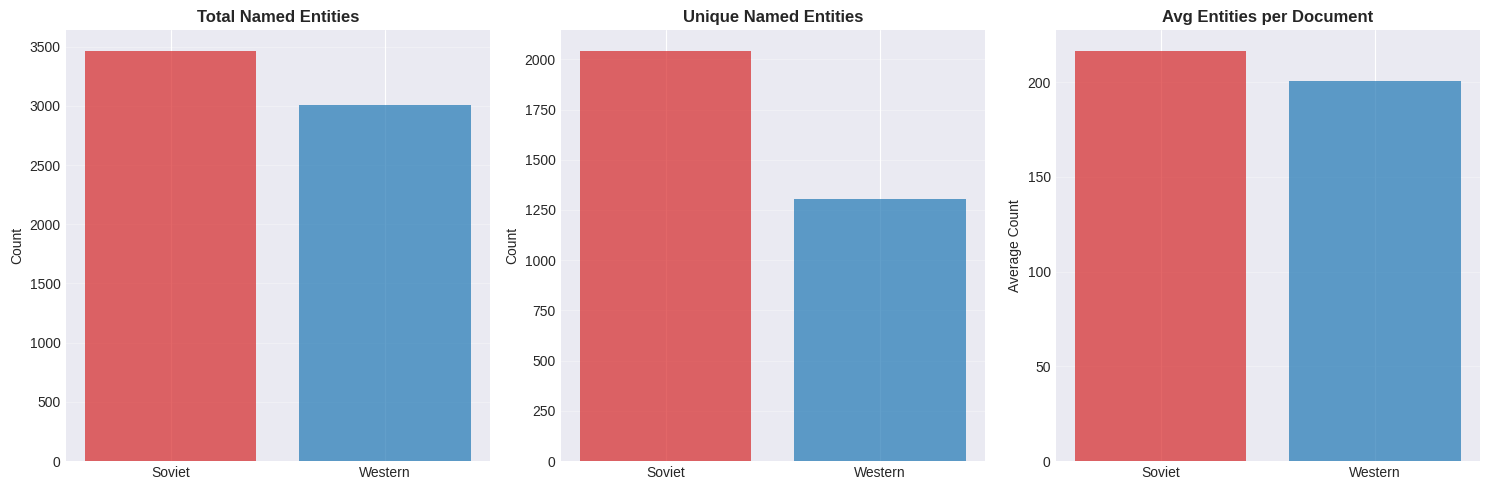

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 70)
print("NAMED ENTITY ANALYSIS: SOVIET vs WESTERN DOCUMENTS")
print("=" * 70)

# Basic statistics
print("\n📊 BASIC STATISTICS")
print("-" * 70)

soviet_total_entities = sum(len(entities) for entities in soviet_df['named_entities'])
western_total_entities = sum(len(entities) for entities in western_df['named_entities'])

soviet_unique_entities = len(set(entity for entities in soviet_df['named_entities'] for entity in entities))
western_unique_entities = len(set(entity for entities in western_df['named_entities'] for entity in entities))

soviet_avg_entities = soviet_total_entities / len(soviet_df)
western_avg_entities = western_total_entities / len(western_df)

print(f"Soviet Documents:")
print(f"  • Total entities: {soviet_total_entities:,}")
print(f"  • Unique entities: {soviet_unique_entities:,}")
print(f"  • Avg entities per doc: {soviet_avg_entities:.1f}")
print(f"  • Documents: {len(soviet_df)}")

print(f"\nWestern Documents:")
print(f"  • Total entities: {western_total_entities:,}")
print(f"  • Unique entities: {western_unique_entities:,}")
print(f"  • Avg entities per doc: {western_avg_entities:.1f}")
print(f"  • Documents: {len(western_df)}")

# Visualization 1: Basic comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Total entities
categories = ['Soviet', 'Western']
totals = [soviet_total_entities, western_total_entities]
axes[0].bar(categories, totals, color=['#d62728', '#1f77b4'], alpha=0.7)
axes[0].set_ylabel('Count')
axes[0].set_title('Total Named Entities', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Unique entities
uniques = [soviet_unique_entities, western_unique_entities]
axes[1].bar(categories, uniques, color=['#d62728', '#1f77b4'], alpha=0.7)
axes[1].set_ylabel('Count')
axes[1].set_title('Unique Named Entities', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Average per document
averages = [soviet_avg_entities, western_avg_entities]
axes[2].bar(categories, averages, color=['#d62728', '#1f77b4'], alpha=0.7)
axes[2].set_ylabel('Average Count')
axes[2].set_title('Avg Entities per Document', fontsize=12, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


🔄 ENTITY OVERLAP ANALYSIS
----------------------------------------------------------------------

📊 Overlap Statistics:
  • Shared entities: 105
  • Soviet-only entities: 1,937
  • Western-only entities: 1,198
  • Overlap percentage: 3.2%

🔗 Top 20 Shared Entities:
Entity                         Soviet     Western    Total     
-----------------------------------------------------------------
Chernobyl                      88         199        287       
Gorbachev                      44         56         100       
Commission                     19         76         95        
USSR                           46         45         91        
Moscow                         8          54         62        
1986                           16         46         62        
IAEA                           6          43         49        
26 April 1986                  11         33         44        
Fig                            22         16         38        
SKALA                      

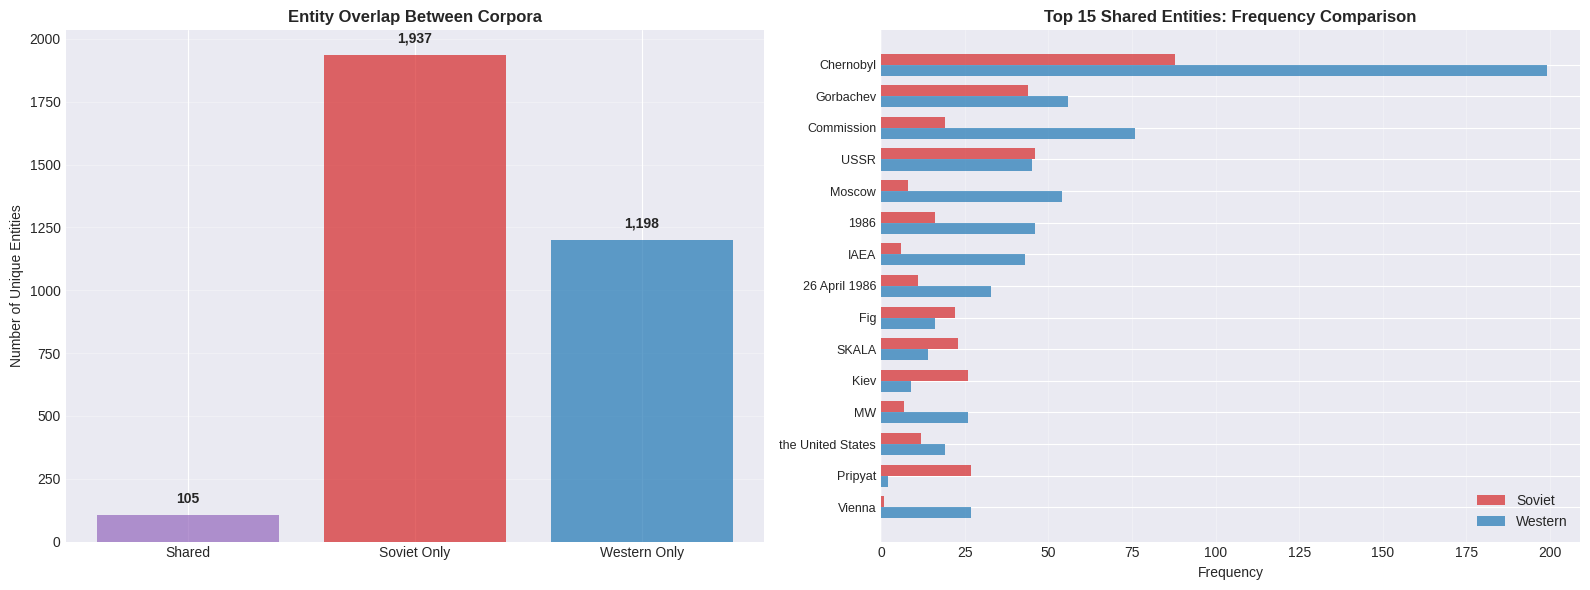

In [27]:
print("\n" + "=" * 70)
print("🔄 ENTITY OVERLAP ANALYSIS")
print("-" * 70)

# Find shared and unique entities
soviet_all_entities = set(entity for entities in soviet_df['named_entities'] for entity in entities)
western_all_entities = set(entity for entities in western_df['named_entities'] for entity in entities)

shared_entities = soviet_all_entities & western_all_entities
soviet_only = soviet_all_entities - western_all_entities
western_only = western_all_entities - soviet_all_entities

print(f"\n📊 Overlap Statistics:")
print(f"  • Shared entities: {len(shared_entities):,}")
print(f"  • Soviet-only entities: {len(soviet_only):,}")
print(f"  • Western-only entities: {len(western_only):,}")
print(f"  • Overlap percentage: {len(shared_entities)/len(soviet_all_entities | western_all_entities)*100:.1f}%")

# Get frequency of shared entities in both corpora
shared_freq = {}
for entity in shared_entities:
    soviet_count = soviet_entities_counter[entity]
    western_count = western_entities_counter[entity]
    shared_freq[entity] = (soviet_count, western_count, soviet_count + western_count)

# Sort by total frequency
top_shared = sorted(shared_freq.items(), key=lambda x: x[1][2], reverse=True)[:20]

print(f"\n🔗 Top 20 Shared Entities:")
print(f"{'Entity':<30} {'Soviet':<10} {'Western':<10} {'Total':<10}")
print("-" * 65)
for entity, (sov, west, total) in top_shared:
    print(f"{entity:<30} {sov:<10} {west:<10} {total:<10}")

# Visualization 4: Venn diagram style overlap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Overlap counts
overlap_data = {
    'Shared': len(shared_entities),
    'Soviet Only': len(soviet_only),
    'Western Only': len(western_only)
}

colors_overlap = ['#9467bd', '#d62728', '#1f77b4']
axes[0].bar(overlap_data.keys(), overlap_data.values(), color=colors_overlap, alpha=0.7)
axes[0].set_ylabel('Number of Unique Entities')
axes[0].set_title('Entity Overlap Between Corpora', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, (key, val) in enumerate(overlap_data.items()):
    axes[0].text(i, val + 50, f'{val:,}', ha='center', fontweight='bold')

# Top shared entities comparison
top_15_shared = top_shared[:15]
entities_names = [ent for ent, _ in top_15_shared]
soviet_freqs = [freq[0] for _, freq in top_15_shared]
western_freqs = [freq[1] for _, freq in top_15_shared]

x = np.arange(len(entities_names))
width = 0.35

axes[1].barh(x - width/2, soviet_freqs, width, label='Soviet', color='#d62728', alpha=0.7)
axes[1].barh(x + width/2, western_freqs, width, label='Western', color='#1f77b4', alpha=0.7)
axes[1].set_yticks(x)
axes[1].set_yticklabels(entities_names, fontsize=9)
axes[1].set_xlabel('Frequency')
axes[1].set_title('Top 15 Shared Entities: Frequency Comparison', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


💭 SENTIMENT vs ENTITY DENSITY ANALYSIS
----------------------------------------------------------------------

📈 Entity Density Statistics:

Soviet Documents:
  • Mean entity density: 7.07 per 1000 chars
  • Median entity density: 5.89 per 1000 chars
  • Std deviation: 3.36

Western Documents:
  • Mean entity density: 8.65 per 1000 chars
  • Median entity density: 7.35 per 1000 chars
  • Std deviation: 3.75

🔗 Correlation with Sentiment Score:

Soviet Documents:
  • Sentiment vs Entity Count: 0.145
  • Sentiment vs Entity Density: -0.518

Western Documents:
  • Sentiment vs Entity Count: -0.052
  • Sentiment vs Entity Density: 0.017


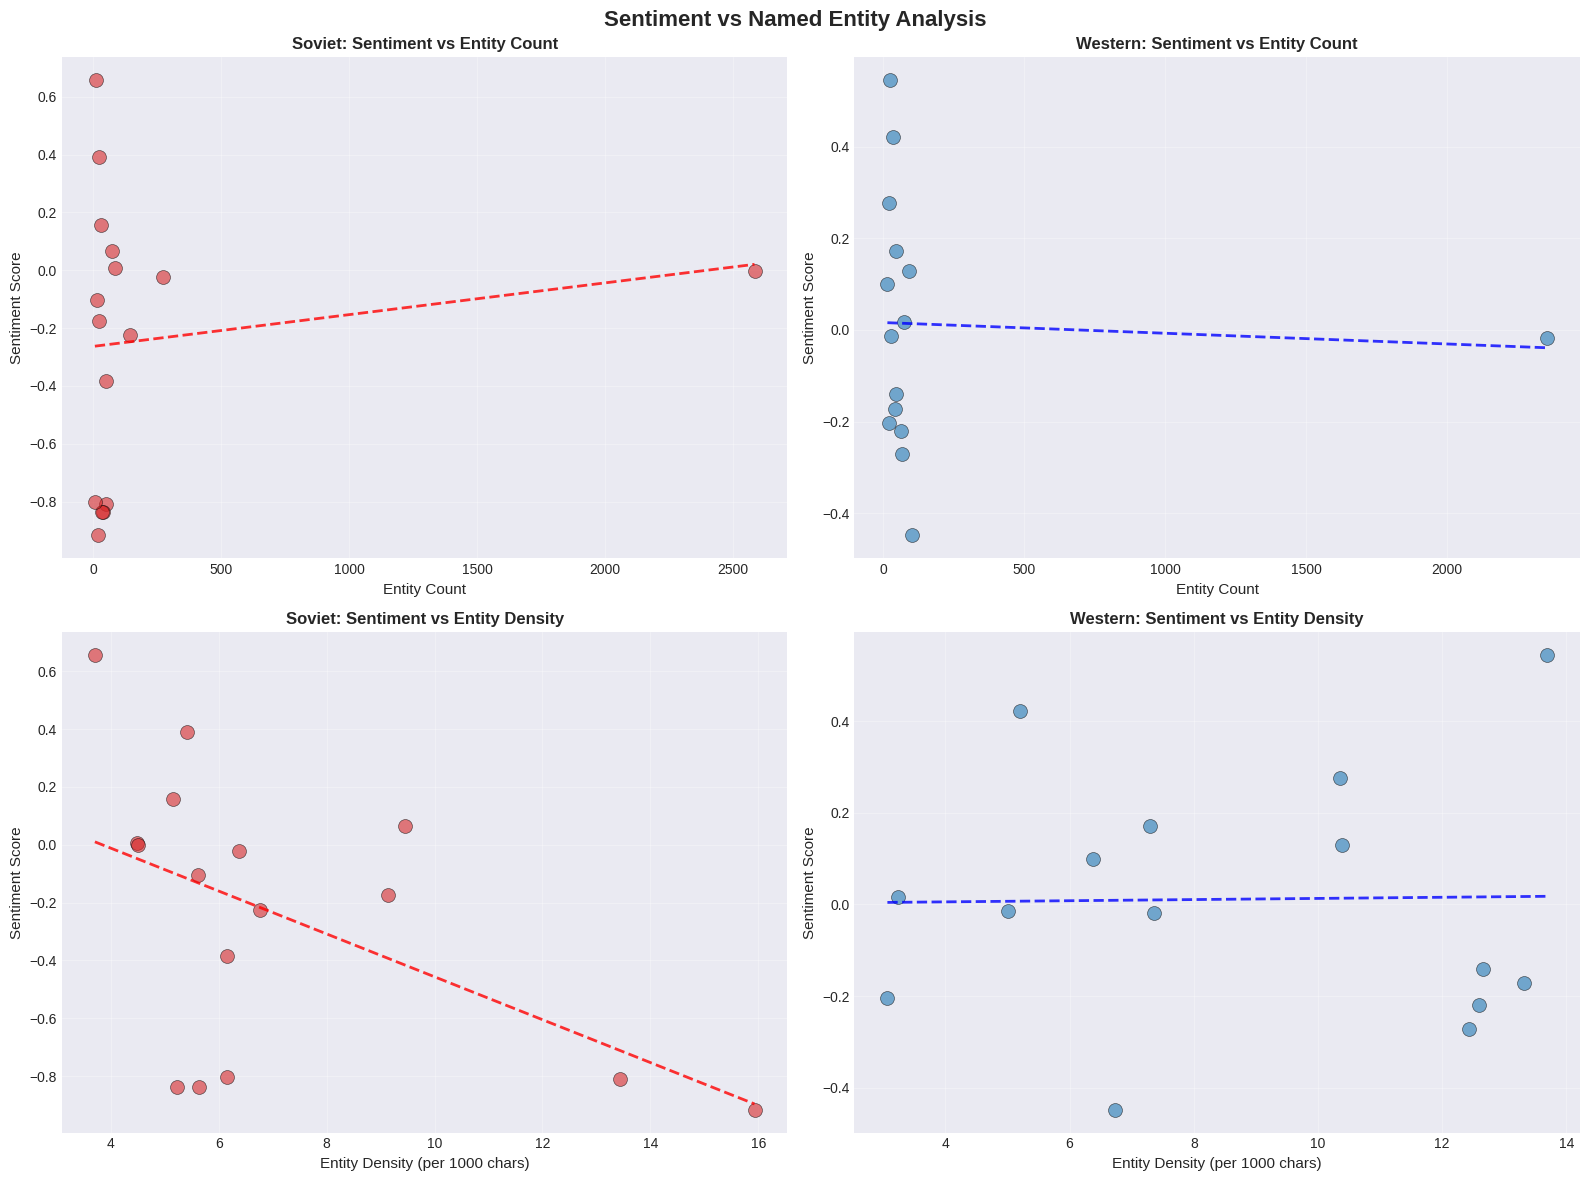

In [28]:
print("\n" + "=" * 70)
print("💭 SENTIMENT vs ENTITY DENSITY ANALYSIS")
print("-" * 70)

# Calculate entity density for each document
soviet_df['entity_count'] = soviet_df['named_entities'].apply(len)
western_df['entity_count'] = western_df['named_entities'].apply(len)

# Calculate document lengths - FIX: use list comprehension instead of .apply()
soviet_df['doc_length'] = [len(doc) for doc in soviet_documents]
western_df['doc_length'] = [len(doc) for doc in western_documents]

soviet_df['entity_density'] = soviet_df['entity_count'] / soviet_df['doc_length'] * 1000  # per 1000 chars
western_df['entity_density'] = western_df['entity_count'] / western_df['doc_length'] * 1000

# Statistics
print(f"\n📈 Entity Density Statistics:")
print(f"\nSoviet Documents:")
print(f"  • Mean entity density: {soviet_df['entity_density'].mean():.2f} per 1000 chars")
print(f"  • Median entity density: {soviet_df['entity_density'].median():.2f} per 1000 chars")
print(f"  • Std deviation: {soviet_df['entity_density'].std():.2f}")

print(f"\nWestern Documents:")
print(f"  • Mean entity density: {western_df['entity_density'].mean():.2f} per 1000 chars")
print(f"  • Median entity density: {western_df['entity_density'].median():.2f} per 1000 chars")
print(f"  • Std deviation: {western_df['entity_density'].std():.2f}")

# Correlation with sentiment
soviet_corr = soviet_df[['sentiment_score', 'entity_count', 'entity_density']].corr()
western_corr = western_df[['sentiment_score', 'entity_count', 'entity_density']].corr()

print(f"\n🔗 Correlation with Sentiment Score:")
print(f"\nSoviet Documents:")
print(f"  • Sentiment vs Entity Count: {soviet_corr.loc['sentiment_score', 'entity_count']:.3f}")
print(f"  • Sentiment vs Entity Density: {soviet_corr.loc['sentiment_score', 'entity_density']:.3f}")

print(f"\nWestern Documents:")
print(f"  • Sentiment vs Entity Count: {western_corr.loc['sentiment_score', 'entity_count']:.3f}")
print(f"  • Sentiment vs Entity Density: {western_corr.loc['sentiment_score', 'entity_density']:.3f}")

# Visualization 5: Scatter plots - Sentiment vs Entities
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Sentiment vs Named Entity Analysis', fontsize=16, fontweight='bold')

# Soviet: Sentiment vs Entity Count
axes[0, 0].scatter(soviet_df['entity_count'], soviet_df['sentiment_score'],
                   alpha=0.6, color='#d62728', s=100, edgecolors='black', linewidth=0.5)
axes[0, 0].set_xlabel('Entity Count', fontsize=11)
axes[0, 0].set_ylabel('Sentiment Score', fontsize=11)
axes[0, 0].set_title('Soviet: Sentiment vs Entity Count', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)
# Add trend line
z = np.polyfit(soviet_df['entity_count'], soviet_df['sentiment_score'], 1)
p = np.poly1d(z)
axes[0, 0].plot(soviet_df['entity_count'].sort_values(),
                p(soviet_df['entity_count'].sort_values()),
                "r--", alpha=0.8, linewidth=2)

# Western: Sentiment vs Entity Count
axes[0, 1].scatter(western_df['entity_count'], western_df['sentiment_score'],
                   alpha=0.6, color='#1f77b4', s=100, edgecolors='black', linewidth=0.5)
axes[0, 1].set_xlabel('Entity Count', fontsize=11)
axes[0, 1].set_ylabel('Sentiment Score', fontsize=11)
axes[0, 1].set_title('Western: Sentiment vs Entity Count', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)
z = np.polyfit(western_df['entity_count'], western_df['sentiment_score'], 1)
p = np.poly1d(z)
axes[0, 1].plot(western_df['entity_count'].sort_values(),
                p(western_df['entity_count'].sort_values()),
                "b--", alpha=0.8, linewidth=2)

# Soviet: Sentiment vs Entity Density
axes[1, 0].scatter(soviet_df['entity_density'], soviet_df['sentiment_score'],
                   alpha=0.6, color='#d62728', s=100, edgecolors='black', linewidth=0.5)
axes[1, 0].set_xlabel('Entity Density (per 1000 chars)', fontsize=11)
axes[1, 0].set_ylabel('Sentiment Score', fontsize=11)
axes[1, 0].set_title('Soviet: Sentiment vs Entity Density', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)
z = np.polyfit(soviet_df['entity_density'], soviet_df['sentiment_score'], 1)
p = np.poly1d(z)
axes[1, 0].plot(soviet_df['entity_density'].sort_values(),
                p(soviet_df['entity_density'].sort_values()),
                "r--", alpha=0.8, linewidth=2)

# Western: Sentiment vs Entity Density
axes[1, 1].scatter(western_df['entity_density'], western_df['sentiment_score'],
                   alpha=0.6, color='#1f77b4', s=100, edgecolors='black', linewidth=0.5)
axes[1, 1].set_xlabel('Entity Density (per 1000 chars)', fontsize=11)
axes[1, 1].set_ylabel('Sentiment Score', fontsize=11)
axes[1, 1].set_title('Western: Sentiment vs Entity Density', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)
z = np.polyfit(western_df['entity_density'], western_df['sentiment_score'], 1)
p = np.poly1d(z)
axes[1, 1].plot(western_df['entity_density'].sort_values(),
                p(western_df['entity_density'].sort_values()),
                "b--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()